# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, Normalizer
import tensorflow as tf
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("./data.csv",sep=",")

In [4]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [5]:
df.isnull().sum()

layer_height          0
wall_thickness        0
infill_density        0
infill_pattern        0
nozzle_temperature    0
bed_temperature       0
print_speed           0
material              0
fan_speed             0
roughness             0
tension_strenght      0
elongation            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [7]:
#Selecting categorical cols
categorical_cols = [cname for cname in df.columns if df[cname].dtype == "object"]

#Selecting numerical columns
numerical_cols = [cname for cname in df.columns if 
                df[cname].dtype in ['int64', 'float64']]

print(categorical_cols)
print(numerical_cols)

['infill_pattern', 'material']
['layer_height', 'wall_thickness', 'infill_density', 'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed', 'roughness', 'tension_strenght', 'elongation']


In [8]:
my_cols = categorical_cols + numerical_cols
data = df[my_cols].copy()

In [9]:
data.head()

,infill_pattern,material,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
0,grid,abs,0.02,8,90,220,60,40,0,25,18,1.2
1,honeycomb,abs,0.02,7,90,225,65,40,25,32,16,1.4
2,grid,abs,0.02,1,80,230,70,40,50,40,8,0.8
3,honeycomb,abs,0.02,4,70,240,75,40,75,68,10,0.5
4,grid,abs,0.02,6,90,250,80,40,100,92,5,0.7


# Encoding the categorical values

In [10]:
ordinal_encoder = OrdinalEncoder()
data[categorical_cols] = ordinal_encoder.fit_transform(data[categorical_cols])

In [11]:
data.head()

,infill_pattern,material,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
0,0.0,0.0,0.02,8,90,220,60,40,0,25,18,1.2
1,1.0,0.0,0.02,7,90,225,65,40,25,32,16,1.4
2,0.0,0.0,0.02,1,80,230,70,40,50,40,8,0.8
3,1.0,0.0,0.02,4,70,240,75,40,75,68,10,0.5
4,0.0,0.0,0.02,6,90,250,80,40,100,92,5,0.7


In [12]:
for column in df.columns:
    print("{} : {}".format(column,df[column].unique()))

layer_height : [0.02 0.06 0.1  0.15 0.2 ]
wall_thickness : [ 8  7  1  4  6 10  5  9  2  3]
infill_density : [90 80 70 40 10 20 50 30 60]
infill_pattern : ['grid' 'honeycomb']
nozzle_temperature : [220 225 230 240 250 200 205 210 215]
bed_temperature : [60 65 70 75 80]
print_speed : [ 40  60 120]
material : ['abs' 'pla']
fan_speed : [  0  25  50  75 100]
roughness : [ 25  32  40  68  92  60  55  21  24  30  75 118 200 220 126 145  88  74
 120 144 265 312 368 180 176 128 138 121 168 154 225 289 326 192 212 172
 163 276 298 360 357 321 278 244]
tension_strenght : [18 16  8 10  5 24 12 14 27 25 37  9 23 26 33 29 19 11 34 13 22  4 35 28
 21 30]
elongation : [1.2 1.4 0.8 0.5 0.7 1.1 1.3 1.5 1.7 2.4 1.  2.2 1.9 1.6 2.1 2.  0.9 0.4
 1.8 2.9 0.6 2.8 2.3 3.3 3.1 2.7 3.2]


# Correlation Heatmap

In [13]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm').set_precision(3)

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
layer_height,1.000,-0.193,0.003,-0.000,-0.000,-0.056,0.000,0.801,0.338,0.508
wall_thickness,-0.193,1.000,0.103,-0.118,-0.029,-0.420,-0.029,-0.227,0.400,0.176
infill_density,0.003,0.103,1.000,0.239,0.000,-0.094,0.000,0.118,0.358,0.159
nozzle_temperature,-0.000,-0.118,0.239,1.000,0.602,0.000,0.602,0.349,-0.406,-0.527
bed_temperature,-0.000,-0.029,0.000,0.602,1.000,0.000,1.000,0.192,-0.253,-0.301
print_speed,-0.056,-0.420,-0.094,0.000,0.000,1.000,0.000,0.121,-0.265,-0.234
fan_speed,0.000,-0.029,0.000,0.602,1.000,0.000,1.000,0.192,-0.253,-0.301
roughness,0.801,-0.227,0.118,0.349,0.192,0.121,0.192,1.000,0.052,0.099
tension_strenght,0.338,0.400,0.358,-0.406,-0.253,-0.265,-0.253,0.052,1.000,0.838
elongation,0.508,0.176,0.159,-0.527,-0.301,-0.234,-0.301,0.099,0.838,1.000


# Extracting the target column

In [14]:
target = data["material"].values
X = data.copy()
X.drop(['material'],axis=1,inplace=True)

# Normalizing the numerical_columns

In [15]:
normalize = Normalizer()
X[numerical_cols] = normalize.fit_transform(X[numerical_cols])

In [16]:
X.head(5)

,infill_pattern,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,roughness,tension_strenght,elongation
0,0.0,0.000080,0.031945,0.359384,0.878494,0.239589,0.159726,0.000000,0.099829,0.071877,0.004792
1,1.0,0.000078,0.027144,0.348989,0.872473,0.252048,0.155106,0.096941,0.124085,0.062043,0.005429
2,0.0,0.000076,0.003781,0.302446,0.869532,0.264640,0.151223,0.189029,0.151223,0.030245,0.003024
3,1.0,0.000071,0.014134,0.247348,0.848050,0.265016,0.141342,0.265016,0.240281,0.035335,0.001767
4,0.0,0.000064,0.019252,0.288786,0.802183,0.256699,0.128349,0.320873,0.295203,0.016044,0.002246


# train-test split

In [17]:
x_train, x_valid, y_train, y_valid = train_test_split(X,target,test_size = 0.1,random_state=1)

In [19]:
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(45, 11)
(5, 11)
(45,)
(5,)


 Model like DecisionTreeClassifier were overfitting the training data, so we have used DNN.

# Building a DNN Model

In [128]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512,activation="relu",input_shape=(11,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

The Learning rate was adjusted by using LearningRateScheduler callback and then, the appropriate value is used.

In [132]:
optimizer = tf.keras.optimizers.RMSprop(lr=6e-3)
model.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['accuracy'])

In [133]:
history = model.fit(x_train,y_train,
                    epochs=50,verbose=2)

Epoch 1/50
2/2 - 4s - loss: 0.0831 - accuracy: 0.8444
Epoch 2/50
2/2 - 0s - loss: 0.2777 - accuracy: 0.6444
Epoch 3/50
2/2 - 0s - loss: 0.2233 - accuracy: 0.6889
Epoch 4/50
2/2 - 0s - loss: 0.1910 - accuracy: 0.7111
Epoch 5/50
2/2 - 0s - loss: 0.1236 - accuracy: 0.8444
Epoch 6/50
2/2 - 0s - loss: 0.1124 - accuracy: 0.8667
Epoch 7/50
2/2 - 0s - loss: 0.1257 - accuracy: 0.8000
Epoch 8/50
2/2 - 0s - loss: 0.2137 - accuracy: 0.6667
Epoch 9/50
2/2 - 0s - loss: 0.1152 - accuracy: 0.8444
Epoch 10/50
2/2 - 0s - loss: 0.1092 - accuracy: 0.8444
Epoch 11/50
2/2 - 0s - loss: 0.1010 - accuracy: 0.8667
Epoch 12/50
2/2 - 0s - loss: 0.0974 - accuracy: 0.8667
Epoch 13/50
2/2 - 0s - loss: 0.1561 - accuracy: 0.8000
Epoch 14/50
2/2 - 0s - loss: 0.0770 - accuracy: 0.9111
Epoch 15/50
2/2 - 0s - loss: 0.0806 - accuracy: 0.9111
Epoch 16/50
2/2 - 0s - loss: 0.0864 - accuracy: 0.8667
Epoch 17/50
2/2 - 0s - loss: 0.0568 - accuracy: 0.9111
Epoch 18/50
2/2 - 0s - loss: 0.0933 - accuracy: 0.9111
Epoch 19/50
2/2 - 0

# Plotting the training loss and accuracy graph

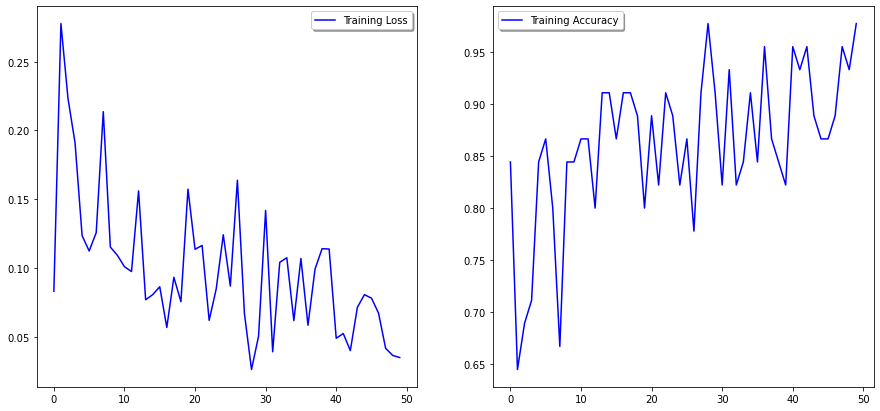

In [134]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color='b', label='Training Loss')
legend = ax1.legend(loc='best', shadow=True)
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['accuracy'], color='b', label='Training Accuracy')
legend = ax2.legend(loc='best', shadow=True)

# Validation MSE

In [137]:
preds = model.predict(x_valid)
print("MSE Validation: ",mean_squared_error(y_valid,preds))

MSE Validation:  0.1371191760953872


We got around 86.28% validaiton accuracy. Accuracy can be furthur increased by getting more data and more hyperparameter tuning.